In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import numpy as np
from readts import TSFile
import matplotlib.pyplot as plt

In [3]:
cuvac = TSFile('CuVac', 'cuvac-neb')
#cuvac = TSFile('HVac', '../../tests/cuvac-neb-lj/')

In [4]:
cuvac_tst = cuvac.blocks['TST']

cuvac_i = cuvac.blocks['REA'][1][0]
cuvac_f = cuvac.blocks['PRO'][1][0]
cuvac_tst[cuvac_tst.last_index]

[TSBlock(step=47, rcoord=0.0817922128, atoms=Atoms(symbols='Cu31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=47, rcoord=0.187057015, atoms=Atoms(symbols='Cu31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=47, rcoord=0.267788956, atoms=Atoms(symbols='Cu31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=47, rcoord=0.352069197, atoms=Atoms(symbols='Cu31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=47, rcoord=0.428781964, atoms=Atoms(symbols='Cu31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=47, rcoord=0.501450846, atoms=Atoms(symbols='Cu31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=47, rcoord=0.570906412, atoms=Atoms(symbols='Cu31', pbc=True,

<IPython.core.display.Javascript object>


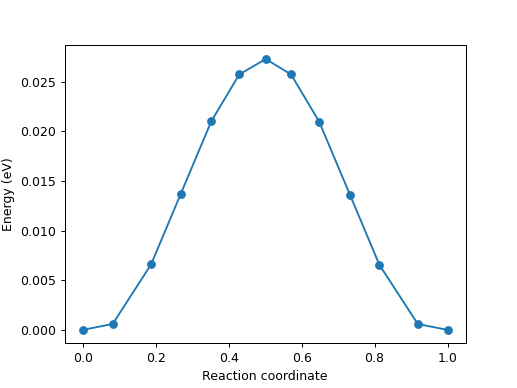

In [15]:
# Energy?
E_tst = cuvac_tst.get_energies(cuvac_tst.last_index)
E = np.zeros(len(E_tst)+2)
E[1:-1] = E_tst
E[0] = cuvac_i.atoms.get_potential_energy()
E[-1] = cuvac_f.atoms.get_potential_energy()

# Coordinates?
rcoords = np.zeros(len(E))
rcoords[1:-1] = cuvac_tst.get_rcoords(cuvac_tst.last_index)
rcoords[-1] = 1

fig, ax = plt.subplots()
ax.set_xlabel('Reaction coordinate')
ax.set_ylabel('Energy (eV)')

ax.plot(rcoords, E-E[0], 'o-')